# Tipos de dispositivos usados por los clientes

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('events.csv')

user_info = df.loc[df['event'] == 'visited site', ['event','person','city',\
                   'region', 'country', 'device_type', 'operating_system_version',\
                   'browser_version']]

df_mobile = user_info.loc[~user_info['device_type'].str.contains('Computer'), :]
df_not_mobile = user_info.loc[user_info['device_type'].str.contains('Computer'), :]


df_mobile['device'] = 'Mobile'
df_mobile = df_mobile[['person','device']]
df_not_mobile['device'] = 'Not Mobile'
df_not_mobile = df_not_mobile[['person','device']]

df_user_device = df_mobile.merge(df_not_mobile, how='outer')
df_user_device = df_user_device.drop_duplicates()

user_info = user_info.merge(df_user_device, how='outer')
user_info = user_info.drop_duplicates()

device_percentage = (user_info.groupby(['country'])['device']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('country'))
device_percentage = device_percentage.loc[device_percentage['percentage'] != 100.0, :]

C:\Users\Juan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Juan\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Juan\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

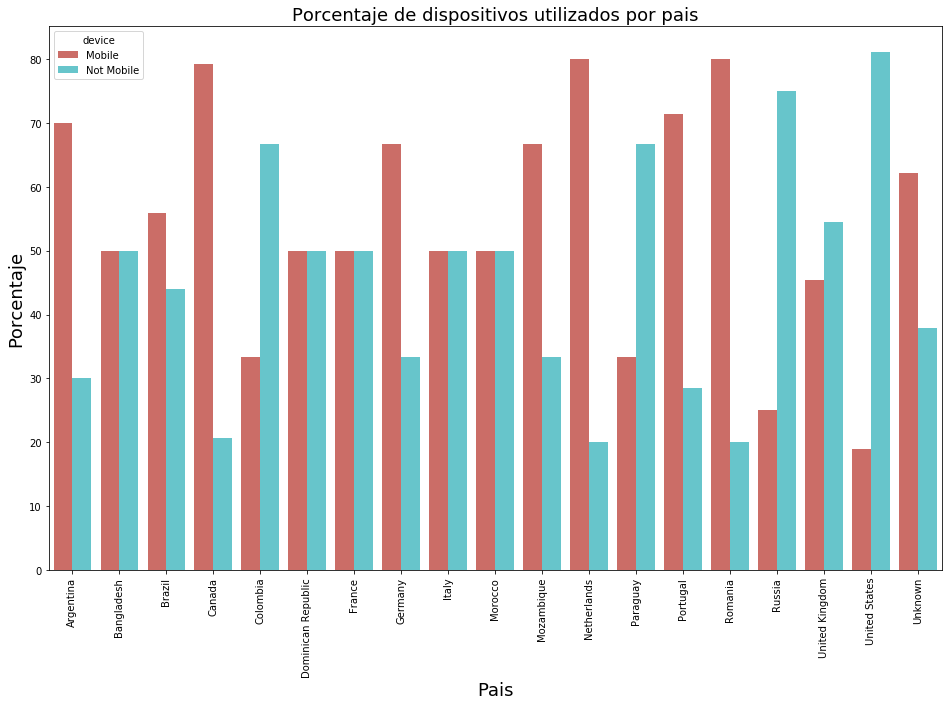

In [5]:
plt.figure(figsize=(16,10))
g = sns.barplot(x="country", y='percentage', hue="device", data=device_percentage,\
                palette="hls")
g.set_title("Porcentaje de dispositivos utilizados por pais", fontsize=18)
g.set_xlabel("Pais", fontsize=18)
g.set_ylabel("Porcentaje", fontsize=18)
plt.xticks(rotation=90)